<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Чтение-файлов-и-Изучение-их" data-toc-modified-id="Чтение-файлов-и-Изучение-их-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Чтение файлов и Изучение их</a></span></li><li><span><a href="#Проверка-эфективности-обогащения-по-формуле" data-toc-modified-id="Проверка-эфективности-обогащения-по-формуле-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка эфективности обогащения по формуле</a></span></li><li><span><a href="#&quot;Пропавшие-признаки&quot;-столбцы-в-тестовой-выборке" data-toc-modified-id="&quot;Пропавшие-признаки&quot;-столбцы-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>"Пропавшие признаки" столбцы в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлво-на-разных-стадиях-очистки" data-toc-modified-id="Концентрация-металлво-на-разных-стадиях-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлво на разных стадиях очистки</a></span></li><li><span><a href="#Распределение-размера-гранул-сырья" data-toc-modified-id="Распределение-размера-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размера гранул сырья</a></span></li><li><span><a href="#Концентрация-всех-веществ-на-разных-стадиях" data-toc-modified-id="Концентрация-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Концентрация всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-sMAPE" data-toc-modified-id="Функция-для-вычисления-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления sMAPE</a></span></li><li><span><a href="#Модель-дерева" data-toc-modified-id="Модель-дерева-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель дерева</a></span></li><li><span><a href="#Модель-Леса" data-toc-modified-id="Модель-Леса-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель Леса</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Линейная регрессия</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Необходимо:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

### Чтение файлов и Изучение их

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')

Целевые признаки:
1.	эффективность обогащения чернового концентрата `rougher.output.recovery`
2.	эффективность обогащения финального концентрата `final.output.recovery`


In [3]:
def data_info(df):
       display(df.head(5))
       display(df.describe())
       print("Пропусков в данных: ")
       print(df.isna().sum().sum(), end='\n'*2)
       print("Дубликатов в данных: ", df.duplicated().sum(), end='\n'*2)
       df.info()

In [4]:
data_info(data_train)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


Пропусков в данных: 
4100

Дубликатов в данных:  0

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8

In [5]:
data_info(data_test)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


Пропусков в данных: 
90

Дубликатов в данных:  0

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary

In [6]:
data_info(data_full)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


Пропусков в данных: 
4481

Дубликатов в данных:  0

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8

**Вывод**
<br>В данных есть пропуски, в тренировочной в разы больше чем в тестовой
<br>В тестовых данных признаков меньше чем в тренировочноных

### Проверка эфективности обогащения по формуле

Расчёт эффективности. Нужно смоделировать процесс восстановления золота из золотосодержащей руды.
Эффективность обогащения рассчитывается по формуле
 
 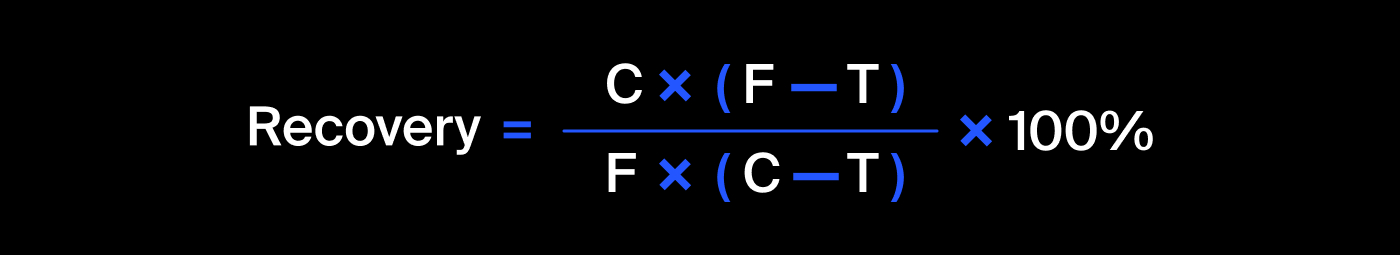

где:
<br>C — доля золота в концентрате после флотации/очистки; (rougher.output.concentrate_au )
<br>F — доля золота в сырье/концентрате до флотации/очистки;(rougher.input.feed_au)
<br>T — доля золота в отвальных хвостах после флотации/очистки. (rougher.output.tail_au )

In [7]:
def calcul_recovery(roc,rif,rot):
    recovery = ((roc*(rif-rot)) / (rif*(roc-rot))) * 100
    recovery[recovery < 0] = np.nan
    recovery[recovery > 100] = np.nan
    
    return recovery

Проверим вычисления на обучающей выборке

In [8]:
recovery_tarin = calcul_recovery(
    data_train['rougher.output.concentrate_au'], 
    data_train['rougher.input.feed_au'], 
    data_train['rougher.output.tail_au'],
)

Вычисляем MAE для признака `rougher.output.recovery` и данных, которые получились с помощью формулы

In [9]:
mae_recovery_train = mean_absolute_error(data_train['rougher.output.recovery'], recovery_tarin)
print('MAE = ',mae_recovery_train)

MAE =  9.73512347450521e-15


Значение MAE-средняя обсолютная ошибка очень мало, значит значения эффективности в данных соответствуют действительности

### "Пропавшие признаки" столбцы в тестовой выборке

In [10]:
search_columns = set.symmetric_difference(set(data_train.columns.to_list()), set(data_test.columns.to_list()))

In [11]:
len(search_columns)

34

In [12]:
len(data_train.columns)

86

In [13]:
data_train[search_columns].dtypes

final.output.concentrate_ag                           float64
final.output.tail_au                                  float64
rougher.output.recovery                               float64
rougher.output.tail_au                                float64
rougher.calculation.floatbank11_sulfate_to_au_feed    float64
rougher.output.concentrate_sol                        float64
rougher.output.concentrate_ag                         float64
primary_cleaner.output.concentrate_au                 float64
final.output.concentrate_pb                           float64
primary_cleaner.output.concentrate_pb                 float64
secondary_cleaner.output.tail_sol                     float64
rougher.output.tail_sol                               float64
rougher.output.tail_pb                                float64
rougher.calculation.au_pb_ratio                       float64
rougher.output.tail_ag                                float64
primary_cleaner.output.concentrate_sol                float64
rougher.

В тестовых данных отсутствуют столбцы с данными `output — параметры продукта`
<br>А так же столбцы имеющие `calculation — расчётные характеристики`

### Предобработка данных

Далее будем разбираться с пропусками, в основном они в обучающих данных

In [14]:
def data_isna(df):
    isna = pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')
    return isna

In [15]:
data_isna(data_train)

,0
final.output.concentrate_ag,0.000000
final.output.concentrate_pb,0.000000
final.output.concentrate_sol,1.000000
final.output.concentrate_au,0.000000
final.output.recovery,0.000000
final.output.tail_ag,0.000000
final.output.tail_pb,1.000000
final.output.tail_sol,0.000000
final.output.tail_au,0.000000
primary_cleaner.input.sulfate,0.000000


In [16]:
data_train.shape

(14149, 86)

Пропуски заполню соседними данными, так как по нашим данным `Соседние по времени параметры часто похожи.`

In [17]:
data_train = data_train.fillna(method='ffill')

In [18]:
print("Осталось пропусков:", data_train.isna().sum().sum())

Осталось пропусков: 0


In [19]:
data_isna(data_test)

,0
primary_cleaner.input.sulfate,0.000000
primary_cleaner.input.depressant,0.000000
primary_cleaner.input.feed_size,0.000000
primary_cleaner.input.xanthate,0.000000
primary_cleaner.state.floatbank8_a_air,0.000000
primary_cleaner.state.floatbank8_a_level,0.000000
primary_cleaner.state.floatbank8_b_air,0.000000
primary_cleaner.state.floatbank8_b_level,0.000000
primary_cleaner.state.floatbank8_c_air,0.000000
primary_cleaner.state.floatbank8_c_level,0.000000


In [20]:
data_test = data_test.fillna(method='ffill')

In [21]:
data_test.shape

(5290, 52)

Добавим в тестовую выборку столбцы с целевыми признаками, выбрав данные из полных данных, с индексом по `data`

In [22]:
print(data_test.shape)
data_test = data_test.merge(data_full[['final.output.recovery', 'rougher.output.recovery']].loc[data_test.index], on='date', how='left')
print(data_test.shape)

(5290, 52)
(5290, 54)


Данные подготовлены к работе. В тестовую выборку добавлены столбцы с ключевыми признаками.
Из всех выборок убрал пропуски

## Анализ данных

### Концентрация металлво на разных стадиях очистки

In [23]:
# сформирую константные переменные, для более удобного обращения к столбцам
METAL_CONCENTRATE = [
    'rougher.input.feed',
    'rougher.output.concentrate',
    'primary_cleaner.output.concentrate',
    'final.output.concentrate',
]
METALS = ['au', 'ag', 'pb']

Создам таблицу для лучшего восприятия,со средними значениями по металлам и построю к ней график

In [24]:
metals_concentrate = pd.DataFrame(columns=METAL_CONCENTRATE)

for metal in METALS: 
 
    for metric in METAL_CONCENTRATE:
        metals_concentrate.loc[metal, metric] = data_full['{}_{}'.format(metric, metal)].mean()


display(metals_concentrate)

,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
au,8.266097,19.772,32.1194,44.076513
ag,8.794927,11.994759,8.442408,5.16847
pb,3.598085,7.606272,9.82953,9.978895


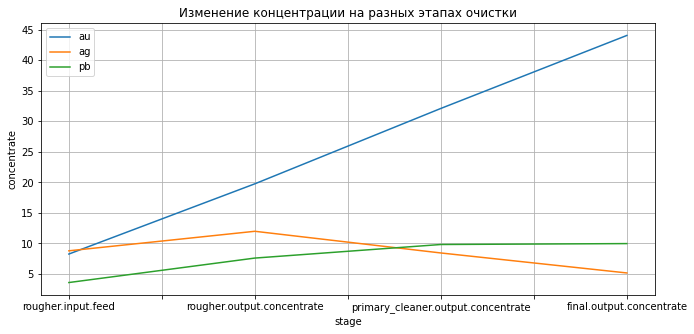

In [25]:
for metal in METALS:
    metals_concentrate.loc[metal].plot(
        title='Изменение концентрации на разных этапах очистки', 
        grid=True, 
        legend=True, 
        figsize=(11, 5)
    ).set(xlabel='stage', ylabel = 'concentrate')
plt.show()

На всех этапах очистки концентрация Золота постоянно растет в среднем 8,26 в начале, достигая максимума на финале очистки - 44,07
<br>Концентрация серебра увеличивается после Флотации и в дальнейшем медленно снижается на каждом этапе очистки с 8,79 до 5,1
<br>Содержание свинца медленно растет с 3,5 на старте очистки до 9,97 в конце очистки

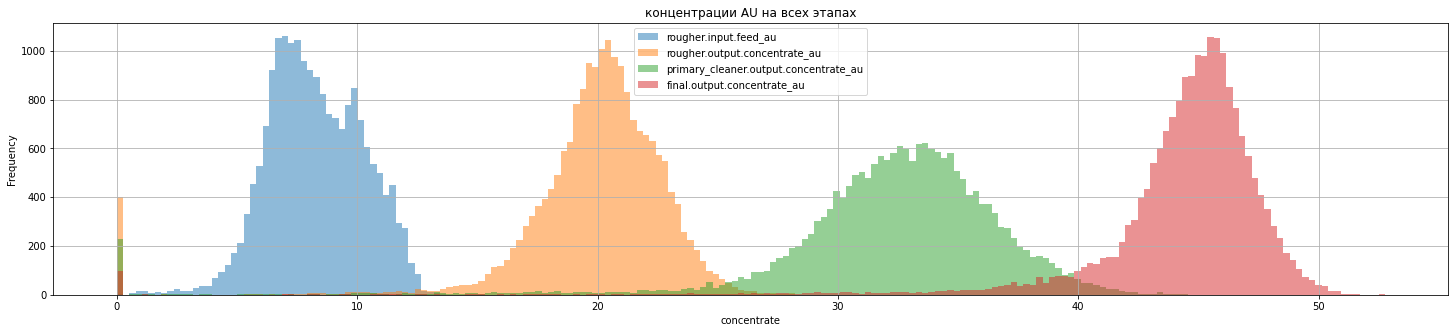

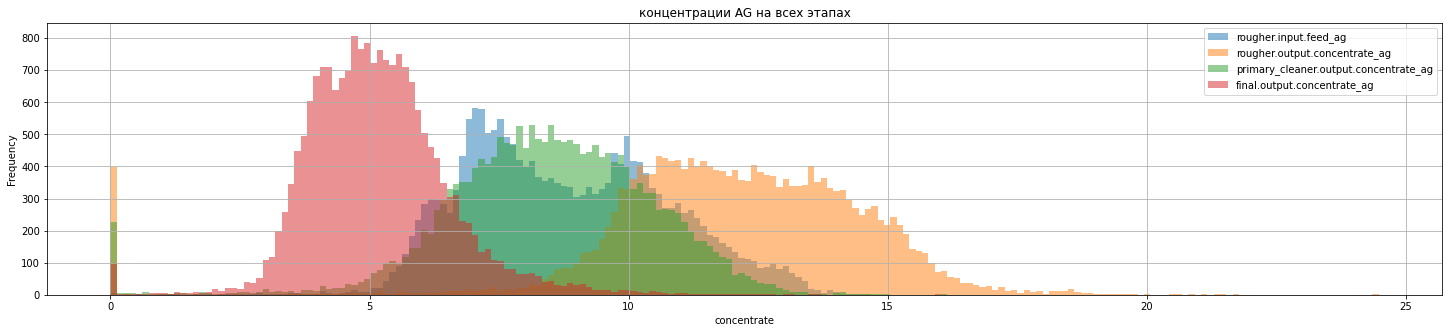

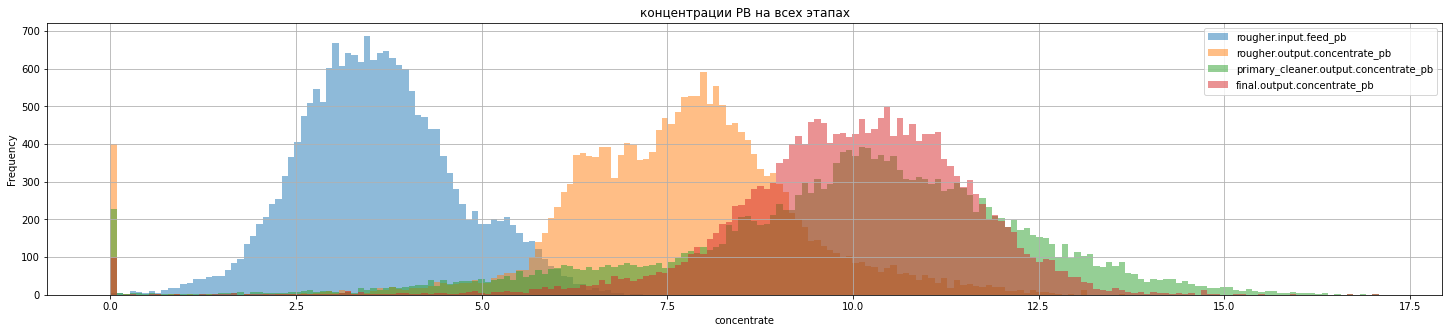

In [26]:
for metal in METALS:
    metrics = ['{}_{}'.format(x, metal) for x in METAL_CONCENTRATE]

    data_full[metrics].plot(
        title = 'концентрации {} на всех этапах'.format(metal.upper()),
        kind='hist', 
        bins=200, 
        grid=True, 
        legend=True,
        figsize=(25, 5),
        alpha=0.5,
    ).set(xlabel='concentrate') 
    
    plt.show()

### Распределение размера гранул сырья

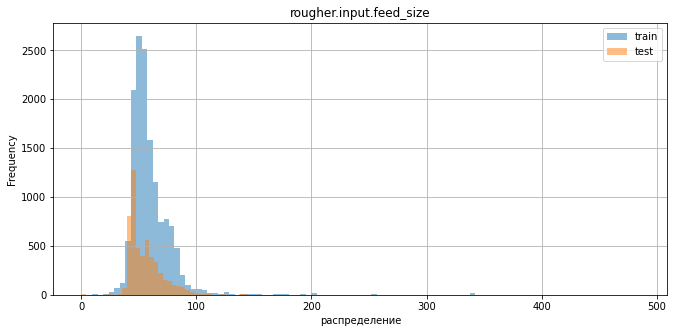

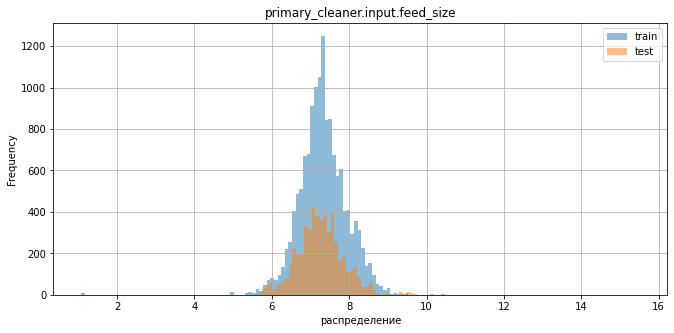

In [27]:
for metric in ('rougher.input.feed_size', 'primary_cleaner.input.feed_size'):
    for label, df in (('train', data_train), ('test', data_test)): 
        df[metric].plot(
                title = '{}'.format(metric),
                kind='hist', 
                bins=100, 
                grid=True, 
                legend=True,
                figsize=(11, 5),
                alpha=0.5,
                label=label,
            ).set(xlabel='распределение')
  
    plt.show()

Графтки размеров гранул обучающей и тестовой выбрки схожи(график тестовоф выборки меньше, так как данных в нем меньше), значит оценка модели будет правильной

### Концентрация всех веществ на разных стадиях

In [28]:
for metric in METAL_CONCENTRATE:
    data_train[metric] = 0
    for metal in METALS + ['sol']:
        data_train[metric] += data_train['{}_{}'.format(metric, metal)]
    
data_train[METAL_CONCENTRATE]

,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
date,,,,
2016-01-15 00:00:00,51.680034,66.424950,72.640924,63.644396
2016-01-15 01:00:00,50.659114,67.012710,72.543485,63.957723
2016-01-15 02:00:00,50.609929,66.103793,72.095042,64.311180
2016-01-15 03:00:00,51.061546,65.752751,59.957723,63.573449
2016-01-15 04:00:00,47.859163,65.908382,71.321010,64.004667
...,...,...,...,...
2018-08-18 06:59:59,53.415050,70.781325,59.001692,68.098589
2018-08-18 07:59:59,53.696482,70.539603,59.703912,68.274362
2018-08-18 08:59:59,54.589604,55.376330,59.561096,68.226068


,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
count,14149.000000,14149.000000,14149.000000,14149.000000
mean,56.242170,67.173145,60.172546,68.387872
std,7.029808,12.713129,10.448165,7.023723
min,0.040000,0.000000,0.000000,0.000000
25%,52.573579,64.914390,58.046816,67.559819
50%,56.627635,69.175663,61.786946,69.141502
75%,60.763234,73.429261,65.355951,70.974661
max,74.458253,88.140119,76.918076,80.210644


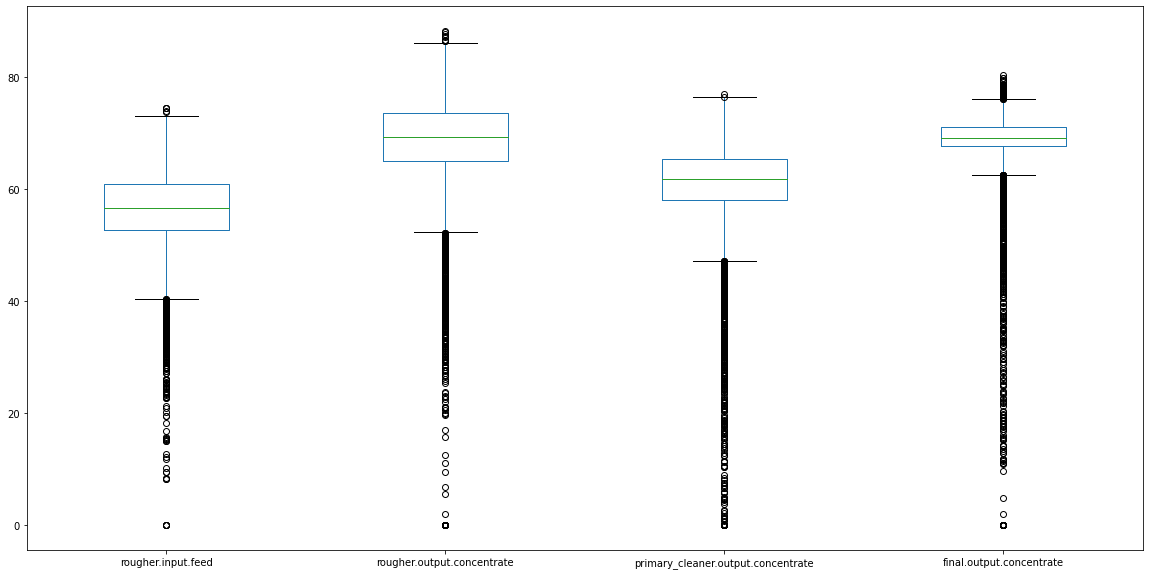

In [29]:
data_train[METAL_CONCENTRATE].plot(kind='box',
                                  figsize=(20,10),)
data_train[METAL_CONCENTRATE].describe() 

Вижу что в данных присутствуют аномалии, с помощью формул поиска квартилей, удалю анамалии, которые не входят в диапозон нормы

In [30]:
def outlier_treatment (col): 
    Q1, Q3 = np.percentile (col, [25,75]) 
    IQR = Q3 - Q1 
    min_line = Q1 - (3 * IQR) 
    max_line = Q3 + (3 * IQR) 
    return min_line, max_line

In [31]:
data_train.shape

(14149, 90)

In [32]:
for x in METAL_CONCENTRATE:
    min_line, max_line = outlier_treatment(data_train[x])
    print(min_line, max_line)
    data_train = data_train.drop(data_train[(data_train[x] > max_line) | (data_train[x] < min_line)].index)

28.004613604444735 85.33220008800006
39.52700514828231 98.87581159449488
36.44659782927826 86.9796643401578
57.349957635633444 81.21388802118082


In [33]:
data_train.shape

(13028, 90)

## Модель

Для коректной работы модели необходимо уровнять количество признаков в обучающей и тестовой выборках, для этого удалим из обучающей выборки эти признаки

In [34]:
TARGETS = ['rougher.output.recovery', 'final.output.recovery']#выделю целевые признаки в отдельную переменную константу

In [35]:
search_columns_2 = set.symmetric_difference(set(data_train.columns.to_list()), set(data_test.columns.to_list()))

In [36]:
data_train = data_train.drop(search_columns_2, axis='columns')

In [37]:
data_train.shape

(13028, 54)

In [38]:
data_test.shape

(5290, 54)

### Функция для вычисления sMAPE

In [39]:
def calculate_smape(target_actual, target_predictions):
    numerator = np.abs(target_actual - target_predictions)
    denominator = (np.abs(target_actual) + np.abs(target_predictions)) / 2 
    
    return (1 / len(target_actual) * np.sum(numerator / denominator) * 100)
    
    
def calculate_final_smape(target_actual, target_predictions):
    target_actual_rougher = target_actual['rougher.output.recovery']
    target_actual_final = target_actual['final.output.recovery']
    
    target_predictions_rougher = target_predictions[:, 0]
    target_predictions_final = target_predictions[:, 1]
    
    return (0.25 * calculate_smape(target_actual_rougher, target_predictions_rougher) \
        + 0.75 * calculate_smape(target_actual_final, target_predictions_final))

In [40]:
smape_scorer = make_scorer(calculate_final_smape)

In [41]:
TARGETS = ['rougher.output.recovery', 'final.output.recovery']

In [42]:
features_train = data_train.drop(TARGETS, axis='columns')
target_train = data_train[TARGETS]
features_test = data_test.drop(TARGETS, axis='columns')
target_test = data_test[TARGETS]

### Модель дерева 

In [43]:
best_score_tabl = []

In [44]:
param_grid = {'max_depth': range(2, 5)}

model = DecisionTreeRegressor(random_state=12345)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train)
best_score_tabl.append(search.best_score_)
print('Лучшее значение sMAPE для дерева решений: {} при значениях гиперпараметров: {}'.format(search.best_score_, search.best_params_))

Лучшее значение sMAPE для дерева решений: 9.22310201260029 при значениях гиперпараметров: {'max_depth': 2}


### Модель Леса

In [45]:
%%time
param_grid = {'max_depth': range(2, 5),
              'n_estimators': range(10, 51, 10)
              }             

model = RandomForestRegressor(random_state=12345)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train)
best_score_tabl.append(search.best_score_)
print('Лучшее значение sMAPE для случайного леса: {} при значениях гиперпараметров: {}'.format(search.best_score_, search.best_params_))

Лучшее значение sMAPE для случайного леса: 8.95702392060945 при значениях гиперпараметров: {'max_depth': 2, 'n_estimators': 10}
CPU times: user 3min 37s, sys: 264 ms, total: 3min 37s
Wall time: 3min 37s


### Линейная регрессия

In [47]:
model = LinearRegression()
model.fit(features_train, target_train)
smape = cross_val_score(model, features_train, target_train, cv=5, scoring=smape_scorer).mean()
best_score_tabl.append(smape)
print('Лучшее значение sMAPE для линейной регрессии:', smape)

Лучшее значение sMAPE для линейной регрессии: 9.829375712476534


In [48]:
sMAPE = pd.DataFrame(data = best_score_tabl, index = ['Tree','Random_forest','Lin_Regres'], columns = ['sMAPE'])

In [49]:
sMAPE

,sMAPE
Tree,9.223102
Random_forest,8.957024
Lin_Regres,9.829376


Лучший показатель sMAPE = 8,95 у Случайного Леса, проверим вычисления на тестовой выборке

In [50]:
model = RandomForestRegressor(max_depth=2, n_estimators=10, random_state=12345) 
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)

print('sMAPE для тестовых данных:', calculate_final_smape(target_test, predictions_test))

sMAPE для тестовых данных: 9.562698152901243


**Вывод**
<br>По итогу работ я исправил отсутствие признаков в тестовой выборке и удалил лишние из обучающей
<br>Проверил работу формулы обогащения на тренировочной выборке
<br>Увидел как на этапах очистки менялась концентрация металлов
<br>В конце изучая модели выбрал лучшую - Случайный Лес, с параметрами:
- глубина деревьев - max_depth=2
- количество деревьев леса - n_estimators=10
<br> На тестовой выборке предсказала значения целевых признаков `rougher.output.recovery` и `final.output.recovery`:
<br> **`sMAPE = 9,56`**